# Outlier Detection and Treatment

Outliers are data points that are significantly different from the other observations in a dataset. They can be caused by errors in data collection, measurement errors, or they may represent rare events or extreme values. Outliers can have a significant impact on statistical analysis, and therefore it is important to detect and treat them appropriately. Here are the steps involved in outlier detection and treatment:

## 1. Visualize the data

The first step in outlier detection is to visualize the data using graphical methods such as scatter plots, box plots, or histograms. This helps to identify any observations that appear to be different from the other data points.

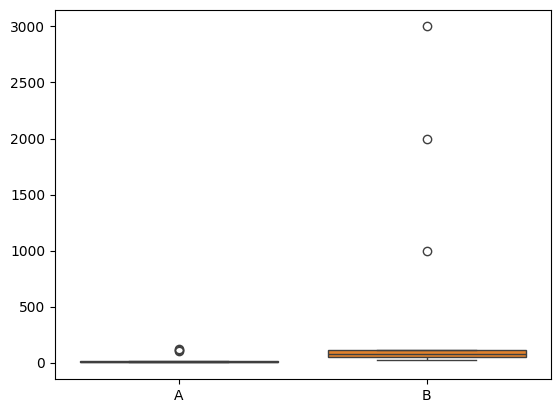

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a DataFrame with some outliers
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 110, 120],
    'B': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 1000, 2000, 3000]
})

sns.boxplot(data=df)
plt.show()

We created a DataFrame with 13 rows and 2 columns, where `column A` contains some outliers `(100, 110, and 120)` and `column B` contains extreme values `(1000, 2000, and 3000)`. We can use this dataset to demonstrate outlier detection and treatment techniques in Python.

## 2. Calculate summary statistics

Summary statistics such as mean, median, standard deviation, and range can provide insight into the distribution of the data and help to identify potential outliers. For example, values that are more than three standard deviations from the mean are often considered outliers.

In [10]:
mean_a = df['A'].mean()
std_dev_a = df['A'].std()
mean_b = df['B'].mean()
std_dev_b = df['B'].std()

print("Column A Mean:", mean_a)
print("Column A Standard Deviation:", std_dev_a)
print("Column B Mean:", mean_b)
print("Column B Standard Deviation:", std_dev_b)

Column A Mean: 29.615384615384617
Column A Standard Deviation: 46.082423369325355
Column B Mean: 511.53846153846155
Column B Standard Deviation: 942.0177471244563


## 3. Use statistical tests

Statistical tests such as the Grubbs' test or the Z-score test can be used to identify outliers. These tests compare the value of an observation to the rest of the data and determine whether it is significantly different.

In [11]:
import numpy as np
from scipy import stats

z_scores_a = stats.zscore(df['A'])
z_scores_b = stats.zscore(df['A'])
filtered_entries_a = (np.abs(z_scores_a) < 1) 
filtered_entries_b = (np.abs(z_scores_b) < 2) 
new_df = df[filtered_entries_a & filtered_entries_b]

new_df

,A,B
0,1,20
1,2,30
2,3,40
3,4,50
4,5,60
5,6,70
6,7,80
7,8,90
8,9,100
9,10,110


## 4. Remove or adjust outliers

Once outliers have been identified, they can either be removed from the dataset or adjusted to a more reasonable value. Removing outliers can be a valid approach if they are due to errors or extreme values that are unlikely to occur again. Adjusting outliers involves replacing them with a more reasonable value, such as the mean or median.

There are several methods for adjusting outliers, including:

- **Trimming:** This involves removing the extreme values from the dataset.
- **Winsorization:** This involves replacing the extreme values with the nearest non-extreme value.
- **Capping:** This involves replacing the extreme values with a predetermined value, such as the maximum or minimum value.

In [12]:
# Print the results
print("Original dataset:")
df

Original dataset:


,A,B
0,1,20
1,2,30
2,3,40
3,4,50
4,5,60
5,6,70
6,7,80
7,8,90
8,9,100
9,10,110


In [13]:
# Trimming method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_trim = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Trimming method:")
df_trim

Trimming method:


,A,B
0,1,20
1,2,30
2,3,40
3,4,50
4,5,60
5,6,70
6,7,80
7,8,90
8,9,100
9,10,110


In [14]:
# Winsorization method
df_wins = df.copy()
df_wins['A'] = np.where(df_wins['A'] > Q3['A'], Q3['A'], np.where(df_wins['A'] < Q1['A'], Q1['A'], df_wins['A']))
df_wins['B'] = np.where(df_wins['B'] > Q3['B'], Q3['B'], np.where(df_wins['B'] < Q1['B'], Q1['B'], df_wins['B']))

print("Winsorization method:")
df_wins

Winsorization method:


,A,B
0,4.0,50.0
1,4.0,50.0
2,4.0,50.0
3,4.0,50.0
4,5.0,60.0
5,6.0,70.0
6,7.0,80.0
7,8.0,90.0
8,9.0,100.0
9,10.0,110.0


In [15]:
# Capping method
df_cap = df.copy()
df_cap['A'] = np.where(df_cap['A'] > 10*Q3['A'], 10*Q3['A'], np.where(df_cap['A'] < 10*Q1['A'], 10*Q1['A'], df_cap['A']))
df_cap['B'] = np.where(df_cap['B'] > 10*Q3['B'], 10*Q3['B'], np.where(df_cap['B'] < 10*Q1['B'], 10*Q1['B'], df_cap['B']))

print("Capping method:")
df_cap

Capping method:


,A,B
0,40.0,500.0
1,40.0,500.0
2,40.0,500.0
3,40.0,500.0
4,40.0,500.0
5,40.0,500.0
6,40.0,500.0
7,40.0,500.0
8,40.0,500.0
9,40.0,500.0
